In [24]:
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
import matplotlib.pyplot as plt
import pandas as pd


data=pd.read_csv('../data/heart_disease.csv')
print(data.shape)
target = data.iloc[:,-1]

data=data.values[:,:-1]

data=np.hstack((np.ones((len(data),1)),data))
data=(data-np.mean(data))/np.std(data)

(303, 14)


Source: https://www.askpython.com/python/examples/principal-component-analysis

In [25]:
data_meaned = data - np.mean(data , axis = 0)
cov_mat = np.cov(data_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

eigenvector_subset = sorted_eigenvectors[:,0:2] #Is the first 2 elements

data_reduced = np.dot(eigenvector_subset.transpose(),data_meaned.transpose()).transpose()
print(data_reduced.shape)

(303, 2)


In [28]:
#target = data.iloc[:,4]
principal_df = pd.DataFrame(data_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

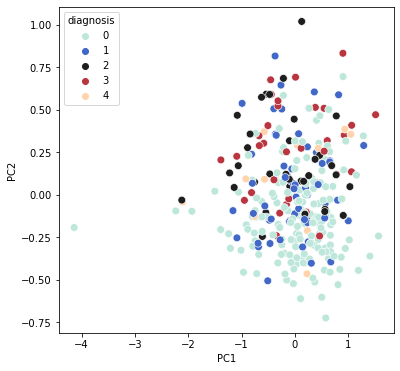

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = target , s = 60 , palette= 'icefire')


In [38]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(data_reduced)
prediction = gm.predict(data_reduced)
print(":)")

:)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

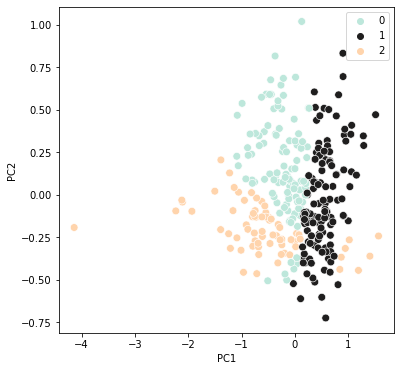

In [39]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = prediction , s = 60 , palette= 'icefire')

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_reduced)
prediction2 = kmeans.predict(data_reduced)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

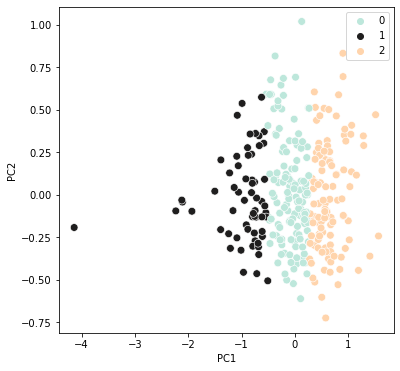

In [42]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = prediction2 , s = 60 , palette= 'icefire')